In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_style('ticks')

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Варіант 9
## Частина 1
### Завдання:
#### 1. Змоделювати послідовність із $N=100$ значень дискретної випадкової величини $X$, заданої одним із варіантів у таблиці
#### 2. Визначити вибіркове математичне сподівання та вибіркову дисперсію отриманої дискретної випадкової величини та порівняти їх з теоретичними значеннями.
#### 3. Побудувати частотну таблицю
#### 4. Побудувати гістограму та оцінити за її допомогою закон розподілу випадкової величини $X$
#### 5. Повторити виконання роботи для $N=1000$. Порівняти результати
Моя таблиця має наступний вигляд:  

| | | | | | | | |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $x_i$ | 2 | 3 | 7 | 12 | 19 | 23 | 30 |
| $p_i$ | 0.04 | 0.15 | 0.2 | 0.25 | 0.2 | 0.15 | 0.01 |

Theoretical E[X]: 12.48
Experimental E[X]: 12.46
Theoretical Var[X]: 52.1096
Experimental Var[X]: 48.29131313131313


,Frequency,Relative Frequency
Interval,,
"[2.0, 4.8)",18,0.180000
"[4.8, 7.6)",15,0.150000
"[7.6, 10.4)",0,0.000000
"[10.4, 13.2)",34,0.340000
"[13.2, 16.0)",0,0.000000
"[16.0, 18.8)",0,0.000000
"[18.8, 21.6)",24,0.240000
"[21.6, 24.4)",6,0.060000
"[24.4, 27.2)",0,0.000000


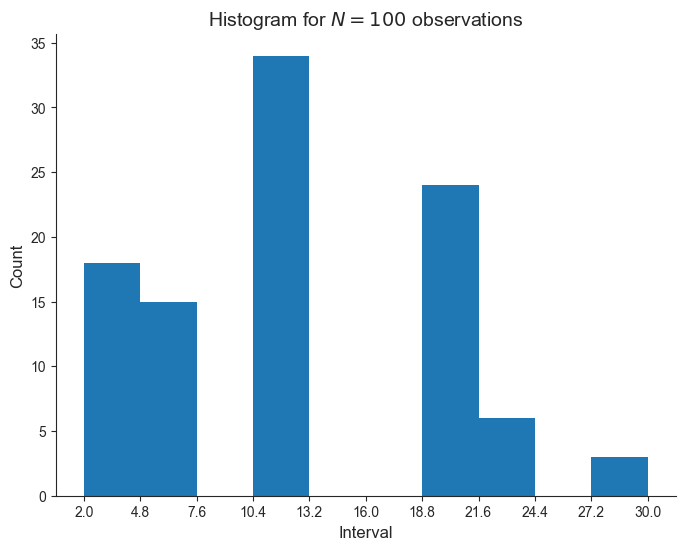

Theoretical E[X]: 12.48
Experimental E[X]: 12.228
Theoretical Var[X]: 52.1096
Experimental Var[X]: 53.311327327327334


,Frequency,Relative Frequency
Interval,,
"[2.0, 4.8)",207,0.207000
"[4.8, 7.6)",198,0.198000
"[7.6, 10.4)",0,0.000000
"[10.4, 13.2)",251,0.251000
"[13.2, 16.0)",0,0.000000
"[16.0, 18.8)",0,0.000000
"[18.8, 21.6)",183,0.183000
"[21.6, 24.4)",150,0.150000
"[24.4, 27.2)",0,0.000000


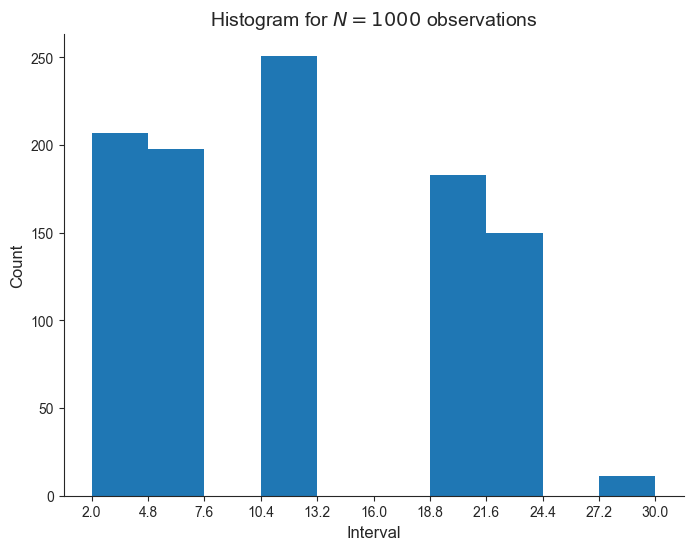

In [2]:
X = np.array([2, 3, 7, 12, 19, 23, 30])
P = np.array([.04, .15, .2, .25, .2, .15, .01])
# gerenate intervals
bins = np.concatenate(([0], np.cumsum(P)))

for n in (100, 1000):
    # generate values with the given distribution 
    x = X.take(np.digitize(np.random.rand(n), bins) - 1)

    # calculate theoretical expected value
    E_X = X.dot(P)
    print('Theoretical E[X]:', E_X)
    print('Experimental E[X]:', x.mean())
    print('Theoretical Var[X]:', P.dot(X ** 2) - E_X ** 2)
    print('Experimental Var[X]:', x.var(ddof=1))

    # create 10 intervals and calculate number of occurences
    counts, intervals = np.histogram(x)
    # display the results
    index = pd.IntervalIndex.from_breaks(intervals.round(1), closed='left', name='Interval')
    df = {'Frequency': counts, 'Relative Frequency': counts / len(x)}
    df = pd.DataFrame(df, index).style.set_caption(f'Frequency table for {n} observations')
    display(df)

    # display histogram
    plt.figure(figsize=(8, 6), dpi=100)
    plt.title(f'Histogram for $N={n}$ observations', fontsize=14)
    plt.xlabel('Interval', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(intervals)
    plt.stairs(counts, intervals, fill=True)
    sns.despine()
    plt.show()

## Частина 2
### Завдання
#### 1. Змоделювати послідовність із $N=100$ значень випадкової величини $X$, розподіленої за законом Пуассона
#### 2. Визначити вибіркове середнє і вибіркову дисперсію та порівняти їх з теоретичними значеннями.
#### 3. Побудувати гістограму та оцінити за її допомогою закон розподілу випадкової величини $X$.
#### 4. Повторити експеримент для $N=1000$

Theoretical E[X]: 9
Experimental E[X]: 8.33
Theoretical Var[X]: 9
Experimental Var[X]: 8.485959595959596


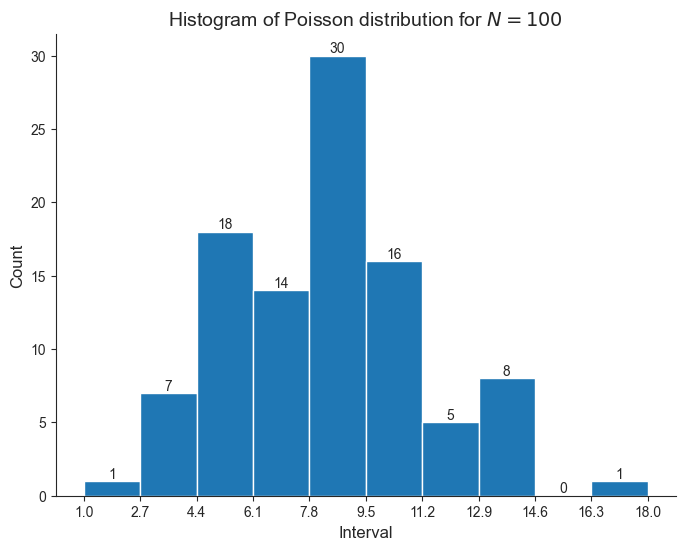

Theoretical E[X]: 9
Experimental E[X]: 8.926
Theoretical Var[X]: 9
Experimental Var[X]: 8.783307307307307


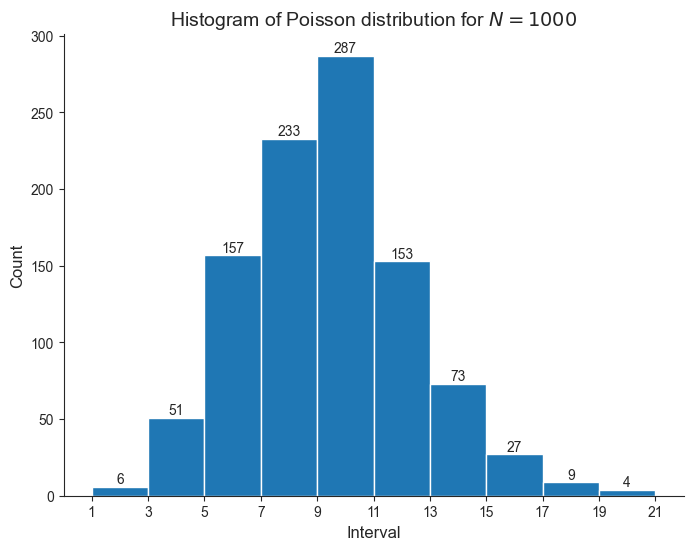

In [3]:
lam = 9
for n in (100, 1000):
    # draw n samples from Poisson distribution
    r = np.random.poisson(lam, n)
    
    # calculate statistics
    print('Theoretical E[X]:', lam)
    print('Experimental E[X]:', r.mean())
    print('Theoretical Var[X]:', lam)
    print('Experimental Var[X]:', r.var(ddof=1))
    
    # plot histogram
    plt.figure(figsize=(8, 6))
    plt.title(f'Histogram of Poisson distribution for $N={n}$', fontsize=14)
    plt.xlabel('Interval', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    counts, intervals, bar_labels = plt.hist(r)
    plt.xticks(intervals)
    plt.bar_label(bar_labels)
    sns.despine()
    plt.show()